# Import

In [45]:
import pandas as pd 
import numpy as np
from scipy import stats

# Data path 

In [4]:

DATA_PATH = '../loan_data/credit_risk_dataset.csv'

# Analyze the data

# Dataframe Description

| **Feature Name**                | **Description**                       |
|----------------------------------|---------------------------------------|
| `person_age`                    | Age                                   |
| `person_income`                 | Annual Income                        |
| `person_home_ownership`         | Home ownership                       |
| `person_emp_length`             | Employment length (in years)         |
| `loan_intent`                   | Loan intent                          |
| `loan_grade`                    | Loan grade                           |
| `loan_amnt`                     | Loan amount                          |
| `loan_int_rate`                 | Interest rate                        |
| `loan_status`                   | Loan status (0 is non-default, 1 is default) |
| `loan_percent_income`           | Percent income                       |
| `cb_person_default_on_file`     | Historical default                   |
| `cb_preson_cred_hist_length`    | Credit history length                |

## Load data 

In [8]:
train_data = pd.read_csv(DATA_PATH)

In [9]:
train_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [13]:
train_data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [39]:
# check the percentage of  missing values out of the total number of rows
missing_values = train_data.isnull().sum()
total_cells = np.int64(train_data.shape[0])
total_missing = missing_values.sum()
total_missing_percentage = (total_missing / total_cells) * 100
print(f'The total missing values in the dataset is {total_missing} which is {total_missing_percentage:.2f}% of the total cells')

The total missing values in the dataset is 4011 which is 12.31% of the total cells


In [42]:
# cheking the number of values missing simultaneously in loan_int_rate and person_emp_length columns
missing_values = train_data[train_data['loan_int_rate'].isnull() & train_data['person_emp_length'].isnull()].shape[0]
print(f'The number of missing values in loan_int_rate and person_emp_length columns simultaneously is {missing_values} which is {missing_values/total_cells:.5f}% of the total cells')

The number of missing values in loan_int_rate and person_emp_length columns simultaneously is 68 which is 0.00209% of the total cells


In [ ]:
# 1. Drop rows with missing values in the 'person_emp_length' and loan interest rate column since it does not impact the dataset significantly
train_data = train_data.dropna(subset=['loan_int_rate', 'person_emp_length'])

## Correlation with features and target 

In [43]:
numeric_columns = train_data.select_dtypes(include=[np.number])
non_numeric_columns = train_data.select_dtypes(exclude=[np.number])

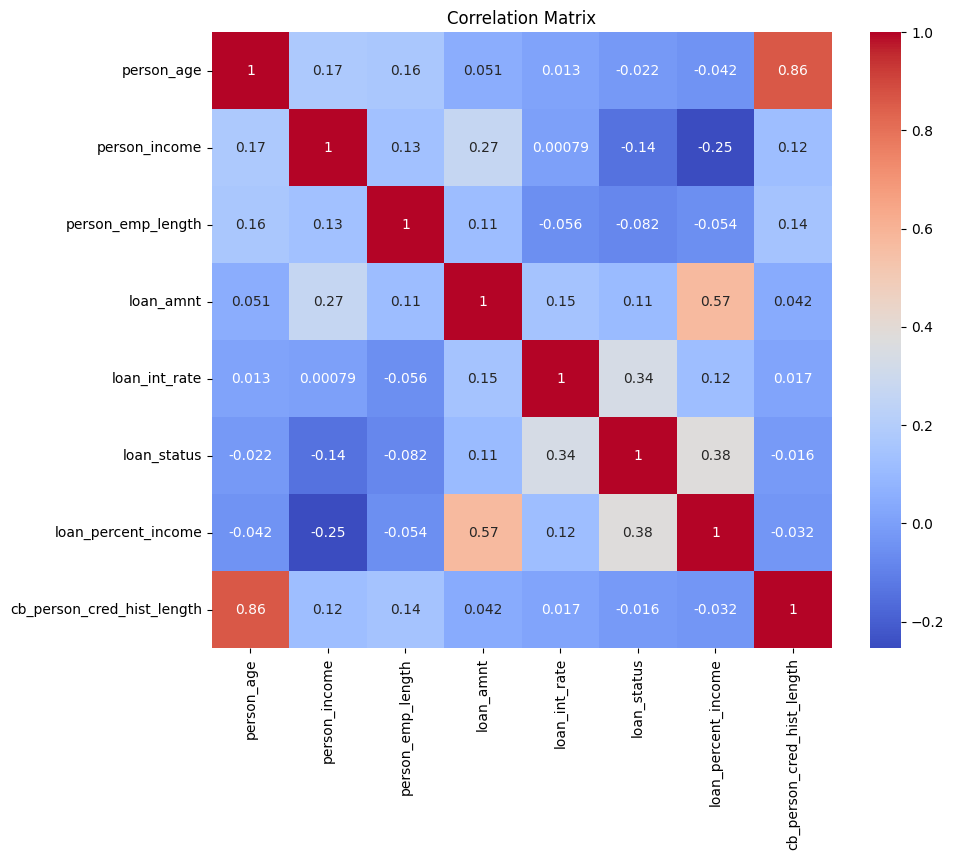

In [48]:
import seaborn as sns

# compute correlation matrix with the numeric columns and the target variable which is 'loan_status'
# and plot it in a heatmap
correlation_matrix = numeric_columns.corr()
correlation_matrix['loan_status'].sort_values(ascending=False)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## View target repartition 

<Axes: xlabel='loan_status'>

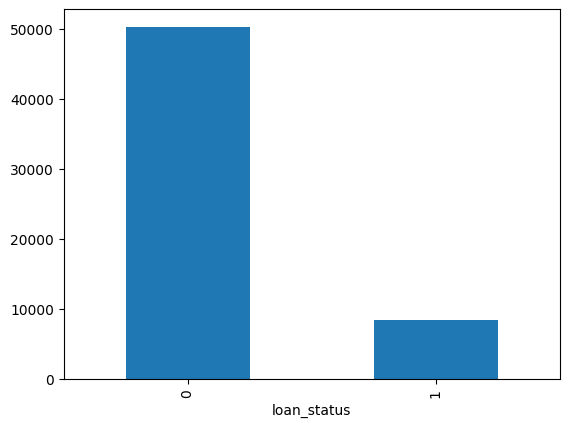

In [55]:
train_data["loan_status"].value_counts().plot(kind='bar')

training data is higly inbalanced, we will need strategies to monitor that 

## Analyze the link between the feature and the target 

### General 

In [35]:
train_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
id,,,,,,,,,,,,
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [52]:
train_data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [54]:
# the data has a person that is 123 years old, which is not possible , lets see how many people are older than 100
train_data[train_data["person_age"] > 100]


In [ ]:
# I will remone the person that is 123 years old in the dataset 
train_data = train_data[train_data["person_age"] < 100]

<Axes: >

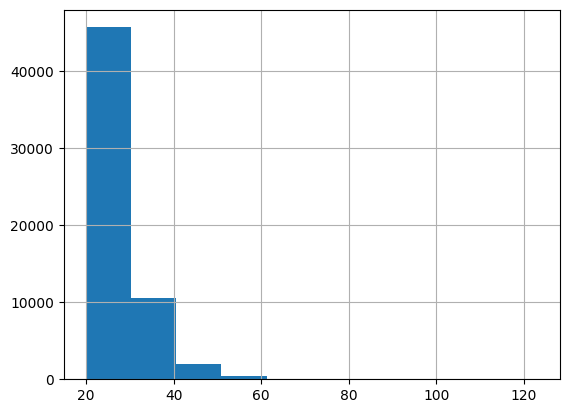

In [38]:
train_data["person_age"].hist()

<Axes: xlabel='person_home_ownership'>

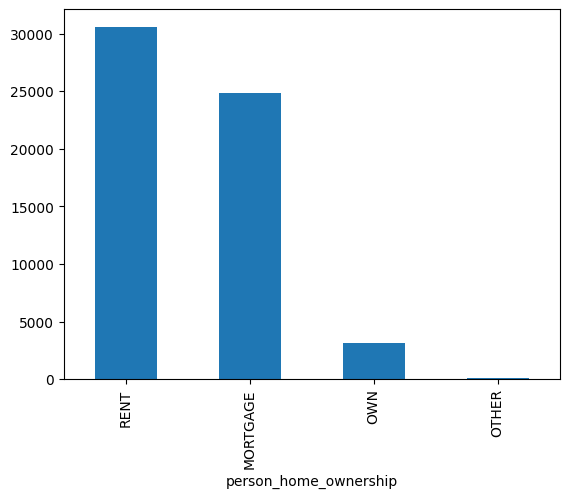

In [36]:
train_data["person_home_ownership"].value_counts().plot(kind='bar')

<Axes: xlabel='loan_intent'>

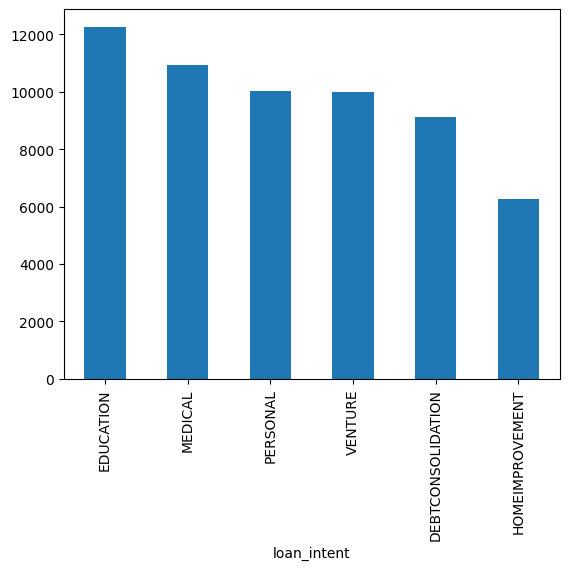

In [37]:
train_data["loan_intent"].value_counts().plot(kind='bar')

### When target = 1

In [45]:
positive_subset = train_data[train_data["loan_status"]==1]

<Axes: >

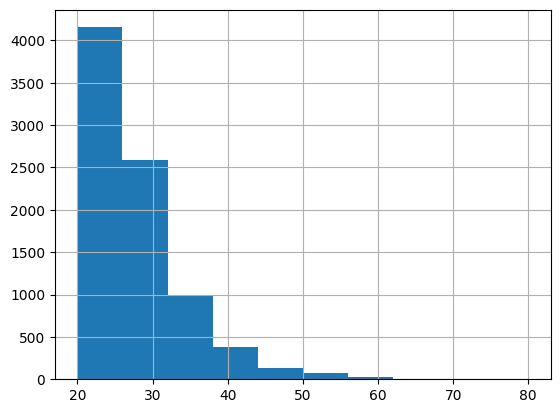

In [46]:
positive_subset["person_age"].hist()

### When target = 0

In [49]:
negative_subset = train_data[train_data["loan_status"]==0]

In [51]:
negative_subset["person_age"].value_counts()

person_age
23     6659
22     5921
24     5497
25     4317
27     3920
26     3301
28     3185
29     2840
30     2040
31     1671
21     1488
32     1375
33     1120
36      942
34      881
37      853
35      733
38      670
39      446
40      376
41      367
43      285
42      237
44      187
46      151
45      139
47      104
48       77
53       61
51       54
50       52
54       49
52       48
49       47
55       27
56       27
58       25
60       22
57       20
65       11
61       11
66       10
64        9
20        9
70        8
59        6
62        6
69        6
84        2
73        2
123       1
Name: count, dtype: int64

<Axes: >

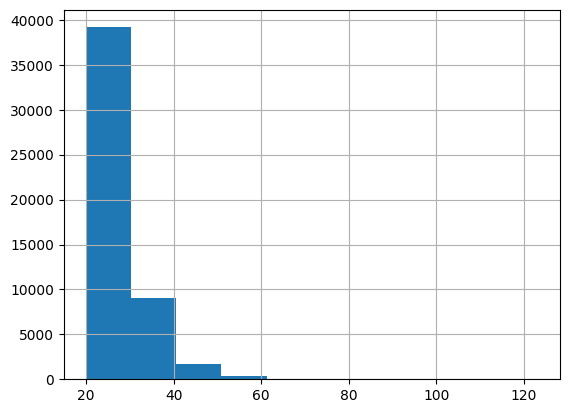

In [48]:
negative_subset["person_age"].hist()